In [2]:
!ls

drive  sample_data


# SNU PLANETA Competition
- Task 2 극지

In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import torch
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os

In [6]:
data_path = '/content/drive/MyDrive/data/planeta'
train = pd.read_csv(os.path.join(data_path, 'train_data.csv'))
train.head(10)

,TIO2(WT%),AL2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),MNO(WT%),K2O(WT%),NA2O(WT%),P2O5(WT%),SC(PPM),V(PPM),CR(PPM),CO(PPM),NI(PPM),CU(PPM),ZN(PPM),RB(PPM),SR(PPM),Y(PPM),ZR(PPM),NB(PPM),CS(PPM),BA(PPM),LA(PPM),CE(PPM),PR(PPM),ND(PPM),SM(PPM),EU(PPM),GD(PPM),TB(PPM),DY(PPM),HO(PPM),ER(PPM),TM(PPM),YB(PPM),LU(PPM),HF(PPM),TA(PPM),PB(PPM),TH(PPM),U(PPM),Thickness
0,0.560000,16.000000,6.703510,6.600000,5.100000,0.11000,1.300000,3.610000,0.150000,18.000000,177.000,165.00000,33.00,81.0,NaN,NaN,29.000000,505.000000,10.800000,81.000000,3.000000,NaN,550.000000,12.100000,25.000000,NaN,13.000000,2.600000,0.770000,2.40000,NaN,2.000000,NaN,1.10000,NaN,0.990000,NaN,NaN,NaN,NaN,2.650000,NaN,0
1,1.130000,17.210000,8.886916,12.120000,7.680000,0.15000,0.240000,2.700000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.530000,16.150000,2.996334,3.980000,1.990000,0.06000,2.180000,4.580000,0.180000,8.050000,68.700,47.80000,6.38,10.8,6.49000,80.40000,65.200000,756.000000,11.500000,161.000000,5.650000,2.140000,1521.000000,24.800000,47.500000,5.92000,22.700000,4.230000,1.110000,3.50000,0.461000,2.400000,0.429000,1.13000,0.156000,1.000000,0.142000,NaN,0.339000,16.700000,7.000000,2.350000,0
3,1.150000,15.100000,7.891246,7.740000,7.930000,0.12000,1.670000,3.010000,0.270000,24.050000,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,490.000000,18.830000,172.000000,12.500000,1.310000,409.000000,35.300000,67.900000,7.51000,30.300000,5.720000,1.390000,5.20000,0.660000,3.840000,0.700000,1.98000,0.300000,1.880000,0.260000,6.740000,0.780000,9.100000,7.600000,1.200000,0
4,0.420000,15.950000,3.761164,4.090000,1.900000,0.06000,2.470000,4.420000,0.140000,7.000000,54.000,32.00000,11.00,16.0,NaN,NaN,68.000000,555.000000,7.000000,28.000000,3.600000,NaN,935.000000,23.000000,43.000000,NaN,18.500000,3.400000,0.900000,2.40000,NaN,1.350000,NaN,0.60000,NaN,0.500000,NaN,NaN,NaN,NaN,5.100000,NaN,0
5,0.370000,15.600000,2.166834,1.720000,1.370000,0.05000,4.320000,3.180000,0.240000,7.000000,58.000,61.00000,7.30,22.0,24.00000,87.00000,373.000000,195.000000,19.000000,152.000000,12.000000,105.000000,820.000000,40.400000,80.600000,NaN,35.100000,4.900000,1.040000,NaN,0.340000,NaN,NaN,NaN,NaN,1.310000,0.190000,5.000000,2.900000,62.000000,22.200000,14.600000,0
6,0.650000,16.500000,5.128860,5.000000,2.640000,0.09000,2.420000,4.140000,0.200000,10.900000,127.000,32.00000,16.50,27.0,NaN,NaN,47.500000,680.000000,12.000000,120.000000,5.500000,NaN,990.000000,25.000000,45.000000,NaN,20.000000,3.700000,1.030000,3.35000,NaN,2.150000,NaN,1.10000,NaN,1.040000,NaN,NaN,NaN,NaN,3.000000,NaN,0
7,0.560000,16.800000,5.173850,5.980000,3.450000,0.10000,1.370000,3.710000,0.160000,14.000000,120.000,112.00000,18.00,33.0,NaN,NaN,26.000000,510.000000,10.400000,78.000000,4.000000,NaN,600.000000,12.200000,23.500000,NaN,13.500000,NaN,0.770000,NaN,NaN,1.900000,NaN,1.10000,NaN,0.950000,NaN,NaN,NaN,NaN,2.500000,NaN,0
8,1.618579,13.456672,6.442568,13.126606,10.654914,0.20247,1.326228,2.703669,0.916604,29.733778,302.514,468.36075,NaN,NaN,188.47575,109.07575,83.142693,1455.172778,27.738894,164.805672,22.120503,1.006771,1016.289592,57.655516,121.236541,15.17592,61.428078,11.834762,3.390597,9.15931,1.222219,6.209152,1.108197,2.65357,0.347112,1.996277,0.288843,4.132123,1.194383,7.891174,6.963459,2.021621,0
9,0.750000,17.650000,6.226616,6.150000,2.980000,0.12000,2.090000,4.480000,0.370000,10.700000,144.000,26.00000,21.00,25.0,NaN,NaN,51.800000,890.000000,14.000000,155.000000,9.000000,NaN,1230.000000,31.500000,59.000000,NaN,26.500000,5.100000,1.390000,3.90000,NaN,2.500000,NaN,1.25000,NaN,1.190000,NaN,NaN,NaN,NaN,5.650000,NaN,0


In [7]:
train.describe()

,TIO2(WT%),AL2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),MNO(WT%),K2O(WT%),NA2O(WT%),P2O5(WT%),SC(PPM),V(PPM),CR(PPM),CO(PPM),NI(PPM),CU(PPM),ZN(PPM),RB(PPM),SR(PPM),Y(PPM),ZR(PPM),NB(PPM),CS(PPM),BA(PPM),LA(PPM),CE(PPM),PR(PPM),ND(PPM),SM(PPM),EU(PPM),GD(PPM),TB(PPM),DY(PPM),HO(PPM),ER(PPM),TM(PPM),YB(PPM),LU(PPM),HF(PPM),TA(PPM),PB(PPM),TH(PPM),U(PPM),Thickness
count,7617.000000,7627.000000,7627.000000,7627.000000,7626.000000,7371.000000,7624.000000,7626.000000,7435.000000,4041.000000,4964.000000,5387.000000,3588.000000,5651.000000,2390.000000,2548.000000,5908.000000,6209.000000,5707.000000,5875.000000,5299.000000,2146.000000,5920.000000,4859.000000,4932.000000,2025.000000,4646.000000,4262.000000,4325.000000,3364.000000,2729.000000,3630.000000,2043.000000,3507.000000,1779.000000,4349.000000,2736.000000,2687.000000,2513.000000,2891.000000,4463.000000,2845.000000,7627.000000
mean,0.840084,16.005030,6.714501,6.946334,4.048144,0.124032,1.844207,3.354879,0.220349,18.575656,170.153416,112.419870,24.184022,46.597583,73.377062,91.335438,63.477667,474.931194,19.305346,122.694314,9.595531,7.865644,573.920832,22.816848,45.147334,5.661520,21.786973,4.513862,1.160925,3.649023,0.684078,3.046314,0.703228,1.663060,0.279370,1.605854,0.285049,3.634002,0.981105,11.826813,7.372216,3.275031,0.387964
std,0.416412,1.635341,2.858482,3.150108,2.678645,0.095873,1.362757,0.932470,0.196345,17.699601,95.365699,175.322252,29.149414,75.567143,196.182684,180.610871,75.709272,349.455853,11.862722,70.552499,23.935873,27.128203,461.250348,18.927438,36.068866,4.875982,14.455528,2.883770,0.639381,1.746571,0.533263,1.528308,0.380518,0.961162,0.174937,0.956803,0.201770,2.002343,1.521921,12.696492,7.870048,4.845684,0.487318
min,0.000000,4.390000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.590000,15.280000,4.831926,4.850000,2.210000,0.080000,0.640000,2.730000,0.130000,9.800000,107.000000,15.683206,13.997500,11.000000,20.000000,65.000000,14.630000,227.800224,12.800000,72.120488,2.900000,0.440000,186.000000,9.228431,18.300000,2.090000,11.500000,2.725052,0.800000,2.550000,0.460000,2.100000,0.500000,1.100000,0.194419,1.010000,0.190000,2.100000,0.172846,3.295000,1.900000,0.540000,0.000000
50%,0.780000,16.180000,6.505554,6.340000,3.430000,0.110000,1.650000,3.470000,0.192000,14.500000,150.000000,44.000000,20.000000,24.000000,41.000000,80.000000,40.000000,441.000000,17.000000,114.000000,5.870000,1.999272,576.644993,18.600000,37.000000,4.800000,19.000000,4.000000,1.070000,3.400000,0.597000,2.750000,0.630000,1.470000,0.244630,1.410000,0.242000,3.540000,0.610000,9.300000,4.600000,1.689000,0.000000
75%,1.010000,16.910000,8.701066,9.580750,5.499650,0.166250,2.760000,4.030000,0.260000,24.000000,224.000000,138.000000,30.000000,55.000000,83.000000,98.000000,83.425000,608.000000,23.000000,165.000000,11.300000,6.300000,803.250000,32.765000,63.362530,7.970000,29.000000,5.650000,1.330000,4.350000,0.770000,3.630000,0.820000,1.970000,0.330000,1.970000,0.340000,5.000000,1.300000,16.720611,10.100000,4.146819,1.000000
max,5.850000,25.530000,22.840000,20.680000,28.700000,6.160000,11.000000,9.460000,8.010000,539.735770,663.000000,2212.000000,1057.479825,1410.000000,2350.000000,7128.000000,1077.000000,4743.000000,375.000000,814.000000,833.479783,739.300000,12389.000000,225.500000,425.700000,82.600000,199.200000,49.000000,9.350000,20.400000,11.000000,25.200000,5.650000,16.320000,2.500000,18.130000,3.090000,21.000000,34.000000,228.000000,104.000000,66.000000,1.000000


In [ ]:
train.isnull().sum()

In [9]:
test = pd.read_csv(os.path.join(data_path,'test_input.csv'))
test.head(10)

,TIO2(WT%),AL2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),MNO(WT%),K2O(WT%),NA2O(WT%),P2O5(WT%),SC(PPM),V(PPM),CR(PPM),CO(PPM),NI(PPM),CU(PPM),ZN(PPM),RB(PPM),SR(PPM),Y(PPM),ZR(PPM),NB(PPM),CS(PPM),BA(PPM),LA(PPM),CE(PPM),PR(PPM),ND(PPM),SM(PPM),EU(PPM),GD(PPM),TB(PPM),DY(PPM),HO(PPM),ER(PPM),TM(PPM),YB(PPM),LU(PPM),HF(PPM),TA(PPM),PB(PPM),TH(PPM),U(PPM)
0,1.000000,15.340000,8.740000,13.300000,7.680000,0.14000,0.260000,2.330000,0.090000,39.419761,264.235040,298.191685,40.741070,102.035872,93.808322,68.583517,5.111586,148.980391,22.755959,50.203352,1.570279,0.128355,36.125974,3.587330,9.172711,1.455107,7.418125,2.517975,0.957632,3.032573,0.521706,3.445595,0.753475,2.175624,0.329385,2.089226,0.324914,1.407370,0.108011,0.843640,0.305881,0.115163
1,1.105920,14.375060,11.438840,12.361560,7.166060,0.20634,0.046540,2.457160,0.073120,44.178022,333.120353,61.324963,49.626789,59.147545,130.139826,103.477341,0.533042,63.740163,26.635604,51.645219,0.706426,0.005765,4.860177,1.438734,5.181906,0.965136,5.679726,2.270337,0.896736,3.609905,0.691708,4.625839,1.021353,2.987150,0.442955,2.974130,0.449079,1.414753,0.044261,0.377547,0.074079,0.024858
2,0.570000,17.100000,9.699922,4.530000,2.550000,0.09000,1.130000,4.530000,0.050000,11.000000,106.000000,75.000000,18.336469,27.000000,33.717415,78.814423,8.900000,452.000000,8.800000,132.000000,3.700000,0.440331,660.000000,8.800000,20.500000,2.344961,9.700000,1.900000,0.820000,1.950000,0.269828,1.600000,0.311089,0.850000,0.123287,0.880000,0.129984,2.473764,0.259204,5.950845,2.200000,0.806990
3,1.310000,15.990000,8.043628,10.960000,6.700000,0.16000,0.480000,2.940000,0.170000,35.200000,252.000000,109.000000,32.700000,52.300000,48.900000,65.800000,6.240000,200.000000,26.500000,91.800000,4.300000,0.320000,52.600000,5.620000,14.200000,2.170000,11.400000,3.490000,1.290000,3.858417,0.770000,5.000000,1.060000,3.090000,0.480000,3.040000,0.440000,2.710000,0.330000,2.520000,0.450000,0.190000
4,1.400000,17.980000,9.780000,9.110000,3.280000,0.17000,1.660000,3.330000,0.320000,24.720000,225.000000,30.100000,26.000000,8.000000,64.853091,113.980633,31.000000,935.000000,17.000000,94.000000,9.000000,1.100000,592.000000,25.400000,51.000000,6.138364,26.000000,5.780000,1.990000,5.496627,0.800000,4.293143,0.841318,2.408336,0.383675,2.400000,0.400000,2.900000,0.500000,6.000000,3.400000,0.700000
5,0.610000,16.300000,6.130000,5.780000,3.740000,0.10000,1.050000,4.220000,0.150000,19.000000,140.000000,87.000000,19.804545,29.000000,31.000000,80.000000,15.700000,424.000000,12.100000,80.000000,2.750000,0.590000,449.000000,7.400000,15.200000,2.040000,9.440000,2.520000,0.810000,2.550000,0.390000,2.230000,0.450000,1.180000,0.170000,1.030000,0.170000,2.300000,0.180000,4.480000,1.050000,0.480000
6,1.700000,14.400000,12.210000,7.900000,3.520000,0.20000,0.450000,2.860000,0.260000,30.400000,399.722965,0.596000,31.100000,2.250000,48.400000,91.300000,6.850000,174.000000,28.900000,62.000000,0.826000,0.169000,93.500000,3.800000,10.400000,1.740000,9.100000,3.120000,1.160000,4.080000,0.750000,5.090000,1.090000,3.160000,0.471000,3.200000,0.484000,1.930000,0.058000,1.220000,0.356000,0.378000
7,0.709644,16.911526,5.288174,5.617185,3.358317,0.07996,1.489254,4.047972,0.189905,14.858667,139.557333,96.381333,18.757667,52.995333,31.024000,150.827667,29.161333,574.000000,10.069667,103.901667,4.379667,0.392000,652.204667,12.521667,24.905667,3.234667,13.514667,3.014333,0.904333,2.444000,0.354667,1.977000,0.359333,0.911000,0.140000,0.911000,0.131000,2.693333,0.279000,0.081000,4.513333,2.226667
8,0.500000,15.050000,2.508738,2.450000,1.060000,0.05000,4.080000,4.310000,0.170000,0.000000,56.000000,8.000000,8.000000,4.000000,9.000000,64.000000,121.000000,481.000000,14.000000,211.000000,11.000000,3.130000,1074.000000,23.900000,60.100000,5.630000,19.900000,3.360000,0.813000,3.020000,0.344000,1.780000,0.316000,0.915000,0.128000,0.813000,0.131000,4.170000,0.604000,14.000000,10.400000,1.810000
9,0.180000,10.470000,7.765592,6.900000,14.180000,0.14000,0.720000,0.600000,0.050000

In [19]:
test.isnull().sum()

TIO2(WT%)     0
AL2O3(WT%)    0
FEOT(WT%)     0
CAO(WT%)      0
MGO(WT%)      0
MNO(WT%)      0
K2O(WT%)      0
NA2O(WT%)     0
P2O5(WT%)     0
SC(PPM)       0
V(PPM)        0
CR(PPM)       0
CO(PPM)       0
NI(PPM)       0
CU(PPM)       0
ZN(PPM)       0
RB(PPM)       0
SR(PPM)       0
Y(PPM)        0
ZR(PPM)       0
NB(PPM)       0
CS(PPM)       0
BA(PPM)       0
LA(PPM)       0
CE(PPM)       0
PR(PPM)       0
ND(PPM)       0
SM(PPM)       0
EU(PPM)       0
GD(PPM)       0
TB(PPM)       0
DY(PPM)       0
HO(PPM)       0
ER(PPM)       0
TM(PPM)       0
YB(PPM)       0
LU(PPM)       0
HF(PPM)       0
TA(PPM)       0
PB(PPM)       0
TH(PPM)       0
U(PPM)        0
dtype: int64

In [22]:
# 훈련 데이터셋의 nan 값을 0 으로 처리
train = train.fillna(0)

In [25]:
y = train['Thickness']
X = train.drop(['Thickness'], axis=1)

In [13]:
tf.random.set_seed(1234)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(6101, 42)
(1526, 42)
(6101,)
(1526,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [28]:
# Decision Tree 모델로 학습
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred=decision_tree.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       922
           1       0.97      0.97      0.97       604

    accuracy                           0.98      1526
   macro avg       0.97      0.97      0.97      1526
weighted avg       0.98      0.98      0.98      1526



In [29]:
# Random Forest 모델로 학습
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred=random_forest.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       922
           1       0.99      0.99      0.99       604

    accuracy                           0.99      1526
   macro avg       0.99      0.99      0.99      1526
weighted avg       0.99      0.99      0.99      1526



In [30]:
# SVM 모델로 학습
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       922
           1       0.81      0.96      0.88       604

    accuracy                           0.90      1526
   macro avg       0.89      0.91      0.90      1526
weighted avg       0.91      0.90      0.90      1526



* 제출파일

In [31]:
# 성능이 좋은 random forest 모델로 제출
y_pred = random_forest.predict(test)
test['Thickness'] = y_pred
submission = test['Thickness']
submission.to_csv(os.path.join(data_path, "submission.csv"), index=False)
display(submission)

0       1
1       1
2       0
3       1
4       0
       ..
2274    0
2275    0
2276    0
2277    0
2278    0
Name: Thickness, Length: 2279, dtype: int64

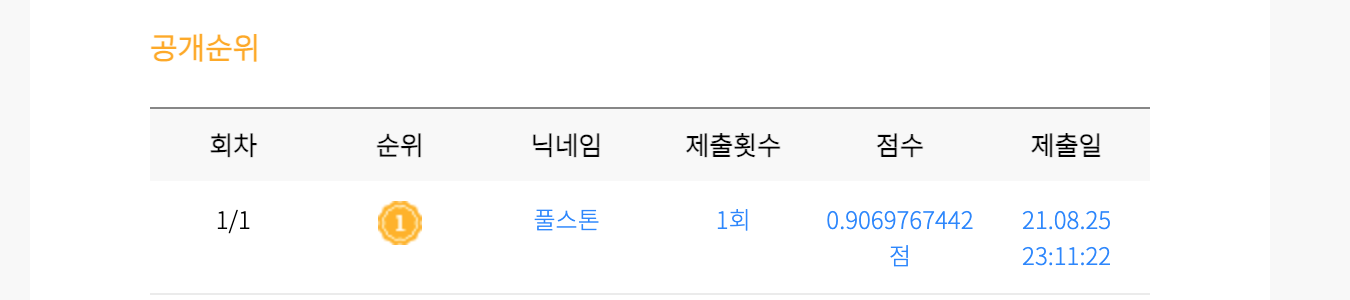